# PyOMADB Examples
-- Alex Warwick Vesztrocy, December 2018

This notebook shows the examples from the paper, as written by Klara Kaleb, using the Python library PyOMADB instead of the OMADB R package.

The PyOMADB package can be installed from the PyPI -- as `omadb`. There are a few optional dependencies:
- `dendropy` -- for dendropy trees
- `ete3` -- for ETE tree visualisation
- `goea` -- to perform GO enrichment analyses using GOATOOLS
- `hog_analysis` -- to perform analysis on hierarchical orthologous groups (HOGs)

In [1]:
!pip install omadb[dendropy,ete3,goea]

You are using pip version 9.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


Now that the package is installed, we can load it.

In [2]:
from omadb import Client

Then the client can be initialised as such:

In [3]:
c = Client()

Note: by default, the client will cache 10,000 `GET` requests in memory. If you wish to raise this, or lower it, this needs to be done prior to initialisation of the client by altering `Client.RAMCACHE_SIZE`.

In [4]:
Client.RAMCACHE_SIZE

10000

---

## Example 1 -- Retrieving single protein entries

In [5]:
prot_id = 'P53_RAT'

r = c.proteins[prot_id]  # Can also be called as c.proteins.info(prot_id)

In [6]:
r

{'alternative_isoforms_urls': [],
 'canonicalid': 'P53_RAT',
 'cdna': 'ATGGAGGATTCACAGTCGGATATGAGCATCGAGCTCCCTCTGAGTCAGGAGACATTTTCATGCTTATGGAAACTTCTTCCTCCAGATGATATTCTGCCCACCACAGCGACAGGGTCACCTAATTCCATGGAAGATCTGTTCCTGCCCCAGGATGTTGCAGAGTTGTTAGAAGGCCCAGAGGAAGCCCTCCAAGTGTCAGCTCCTGCAGCACAGGAACCTGGAACTGAGGCCCCTGCACCCGTGGCCCCTGCTTCAGCTACACCGTGGCCTCTGTCATCTTCCGTCCCTTCTCAAAAAACTTACCAAGGCAACTATGGCTTCCACCTGGGCTTCCTGCAGTCAGGGACAGCCAAGTCTGTTATGTGCACGTACTCAATTTCCCTCAATAAGCTGTTCTGCCAGCTGGCGAAGACATGCCCTGTGCAGTTGTGGGTCACCTCCACACCTCCACCTGGTACCCGTGTCCGTGCCATGGCCATCTACAAGAAGTCACAACACATGACTGAGGTCGTGAGACGCTGCCCCCACCATGAGCGTTGCTCTGATGGTGACGGCCTGGCTCCTCCCCAACATCTTATCCGGGTGGAAGGAAATCCGTATGCTGAGTATCTGGACGACAGGCAGACTTTTCGGCACAGCGTGGTGGTACCGTATGAGCCACCTGAGGTCGGCTCCGACTATACCACTATCCACTACAAGTACATGTGCAACAGCTCCTGCATGGGGGGCATGAACCGCCGGCCCATCCTTACCATCATCACGCTGGAAGACTCCAGTGGGAATCTTCTGGGACGGGACAGCTTTGAGGTTCGTGTTTGTGCCTGTCCTGGGAGAGACCGTCGGACAGAGGAAGAAAATTTCCGCAAAAAAGAAGAGCATTGCCCGGAGCTGCCCCCAGGGAGTGCAAAGAGAGCACTGCCCACCAGCAC

It is then possible to access any of the information on this protein entry, by using attribute or key retrieval. For example,

In [7]:
r.cdna

'ATGGAGGATTCACAGTCGGATATGAGCATCGAGCTCCCTCTGAGTCAGGAGACATTTTCATGCTTATGGAAACTTCTTCCTCCAGATGATATTCTGCCCACCACAGCGACAGGGTCACCTAATTCCATGGAAGATCTGTTCCTGCCCCAGGATGTTGCAGAGTTGTTAGAAGGCCCAGAGGAAGCCCTCCAAGTGTCAGCTCCTGCAGCACAGGAACCTGGAACTGAGGCCCCTGCACCCGTGGCCCCTGCTTCAGCTACACCGTGGCCTCTGTCATCTTCCGTCCCTTCTCAAAAAACTTACCAAGGCAACTATGGCTTCCACCTGGGCTTCCTGCAGTCAGGGACAGCCAAGTCTGTTATGTGCACGTACTCAATTTCCCTCAATAAGCTGTTCTGCCAGCTGGCGAAGACATGCCCTGTGCAGTTGTGGGTCACCTCCACACCTCCACCTGGTACCCGTGTCCGTGCCATGGCCATCTACAAGAAGTCACAACACATGACTGAGGTCGTGAGACGCTGCCCCCACCATGAGCGTTGCTCTGATGGTGACGGCCTGGCTCCTCCCCAACATCTTATCCGGGTGGAAGGAAATCCGTATGCTGAGTATCTGGACGACAGGCAGACTTTTCGGCACAGCGTGGTGGTACCGTATGAGCCACCTGAGGTCGGCTCCGACTATACCACTATCCACTACAAGTACATGTGCAACAGCTCCTGCATGGGGGGCATGAACCGCCGGCCCATCCTTACCATCATCACGCTGGAAGACTCCAGTGGGAATCTTCTGGGACGGGACAGCTTTGAGGTTCGTGTTTGTGCCTGTCCTGGGAGAGACCGTCGGACAGAGGAAGAAAATTTCCGCAAAAAAGAAGAGCATTGCCCGGAGCTGCCCCCAGGGAGTGCAAAGAGAGCACTGCCCACCAGCACAAGCTCCTCTCCCCAGCAAAAGAAAAAACCACTCGATGGAGAATATTTCACCCTTAAGATCCGTGGGCGT

In [8]:
r['cdna']

'ATGGAGGATTCACAGTCGGATATGAGCATCGAGCTCCCTCTGAGTCAGGAGACATTTTCATGCTTATGGAAACTTCTTCCTCCAGATGATATTCTGCCCACCACAGCGACAGGGTCACCTAATTCCATGGAAGATCTGTTCCTGCCCCAGGATGTTGCAGAGTTGTTAGAAGGCCCAGAGGAAGCCCTCCAAGTGTCAGCTCCTGCAGCACAGGAACCTGGAACTGAGGCCCCTGCACCCGTGGCCCCTGCTTCAGCTACACCGTGGCCTCTGTCATCTTCCGTCCCTTCTCAAAAAACTTACCAAGGCAACTATGGCTTCCACCTGGGCTTCCTGCAGTCAGGGACAGCCAAGTCTGTTATGTGCACGTACTCAATTTCCCTCAATAAGCTGTTCTGCCAGCTGGCGAAGACATGCCCTGTGCAGTTGTGGGTCACCTCCACACCTCCACCTGGTACCCGTGTCCGTGCCATGGCCATCTACAAGAAGTCACAACACATGACTGAGGTCGTGAGACGCTGCCCCCACCATGAGCGTTGCTCTGATGGTGACGGCCTGGCTCCTCCCCAACATCTTATCCGGGTGGAAGGAAATCCGTATGCTGAGTATCTGGACGACAGGCAGACTTTTCGGCACAGCGTGGTGGTACCGTATGAGCCACCTGAGGTCGGCTCCGACTATACCACTATCCACTACAAGTACATGTGCAACAGCTCCTGCATGGGGGGCATGAACCGCCGGCCCATCCTTACCATCATCACGCTGGAAGACTCCAGTGGGAATCTTCTGGGACGGGACAGCTTTGAGGTTCGTGTTTGTGCCTGTCCTGGGAGAGACCGTCGGACAGAGGAAGAAAATTTCCGCAAAAAAGAAGAGCATTGCCCGGAGCTGCCCCCAGGGAGTGCAAAGAGAGCACTGCCCACCAGCACAAGCTCCTCTCCCCAGCAAAAGAAAAAACCACTCGATGGAGAATATTTCACCCTTAAGATCCGTGGGCGT

Information that requires another load from the database shows up as "`<API Request ...>`" in the representation of the result, above. If using dictionary-style access, these need to be called. For example, when accessing the orthologue information:

In [9]:
orth = r['orthologs']()

However, if accessing via attributes this is lazily loaded in the background:

In [10]:
orth = r.orthologs

---

## Example 2 -- Sequence to HOG, to HOG Members, to GO Annotations

The idea here is to find a HOG for a given protein sequence, through the mapping procedure provided by the OMA REST API. If we start with the following sequence,

In [11]:
seq = 'MKLVFLVLLFLGALGLCLAGRRRSVQWCAVSQPEATKCFQWQRNMRKVRGPPVSCIKRDSPIQCIQAIAENRADAVTLDGGFIYEAGLAPYKLRPVAAEVYGTERQPRTHYYAVAVVKKGGSFQLNELQGLKSCHTGLRRTAGWNVPIGTLRPFLNWTGPPEPIEAAVARFFSASCVPGADKGQFPNLCRLCAGTGENKCAFSSQEPYFSYSGAFKCLRDGAGDVAFIRESTVFEDLSDEAERDEYELLCPDNTRKPVDKFKDCHLARVPSHAVVARSVNGKEDAIWNLLRQAQEKFGKDKSPKFQLFGSPSGQKDLLFKDSAIGFSRVPPRIDSGLYLGSGYFTAIQNLRKSEEEVAARRARVVWCAVGEQELRKCNQWSGLSEGSVTCSSASTTEDCIALVLKGEADAMSLDGGYVYTAGKCGLVPVLAENYKSQQSSDPDPNCVDRPVEGYLAVAVVRRSDTSLTWNSVKGKKSCHTAVDRTAGWNIPMGLLFNQTGSCKFDEYFSQSCAPGSDPRSNLCALCIGDEQGENKCVPNSNERYYGYTGAFRCLAENAGDVAFVKDVTVLQNTDGNNNEAWAKDLKLADFALLCLDGKRKPVTEARSCHLAMAPNHAVVSRMDKVERLKQVLLHQQAKFGRNGSDCPDKFCLFQSETKNLLFNDNTECLARLHGKTTYEKYLGPQYVAGITNLKKCSTSPLLEACEFLRK'

It is possible to map this to the an OMA protein entry using:

In [12]:
r = c.proteins.search(seq)

In [13]:
r

{'identified_by': 'exact match',
 'query': 'MKLVFLVLLFLGALGLCLAGRRRSVQWCAVSQPEATKCFQWQRNMRKVRGPPVSCIKRDSPIQCIQAIAENRADAVTLDGGFIYEAGLAPYKLRPVAAEVYGTERQPRTHYYAVAVVKKGGSFQLNELQGLKSCHTGLRRTAGWNVPIGTLRPFLNWTGPPEPIEAAVARFFSASCVPGADKGQFPNLCRLCAGTGENKCAFSSQEPYFSYSGAFKCLRDGAGDVAFIRESTVFEDLSDEAERDEYELLCPDNTRKPVDKFKDCHLARVPSHAVVARSVNGKEDAIWNLLRQAQEKFGKDKSPKFQLFGSPSGQKDLLFKDSAIGFSRVPPRIDSGLYLGSGYFTAIQNLRKSEEEVAARRARVVWCAVGEQELRKCNQWSGLSEGSVTCSSASTTEDCIALVLKGEADAMSLDGGYVYTAGKCGLVPVLAENYKSQQSSDPDPNCVDRPVEGYLAVAVVRRSDTSLTWNSVKGKKSCHTAVDRTAGWNIPMGLLFNQTGSCKFDEYFSQSCAPGSDPRSNLCALCIGDEQGENKCVPNSNERYYGYTGAFRCLAENAGDVAFVKDVTVLQNTDGNNNEAWAKDLKLADFALLCLDGKRKPVTEARSCHLAMAPNHAVVSRMDKVERLKQVLLHQQAKFGRNGSDCPDKFCLFQSETKNLLFNDNTECLARLHGKTTYEKYLGPQYVAGITNLKKCSTSPLLEACEFLRK',
 'targets': [{'alternative_isoforms_urls': [],
 'canonicalid': 'TRFL_HUMAN',
 'cdna': 'ATGAAACTTGTCTTCCTCGTCCTGCTGTTCCTCGGGGCCCTCGGACTGTGTCTGGCTGGCCGTAGGAGGAGTGTTCAGTGGTGCGCCGTATCCCAACCCGAGGCCACAAAATGCTTCCAATGGCAAAGGAATATGAGAAAAGTGCGTGGCCCTCCT

From the results above, we can see that the matches were identified as _exact_ matches. This means that they are 100% identical to the query sequence.

Now, let's see how many targets we have matched:

In [14]:
len(r.targets)

1

Here we have matched a single target. Let's find its OMA ID, canonical ID and the HOG that it belongs to.

In [15]:
e = r.targets[0]

In [16]:
e.omaid

'HUMAN20795'

In [17]:
e.canonicalid

'TRFL_HUMAN'

In [18]:
e.oma_hog_id

'HOG:0413862.1a.1b'

Next, we want to access all members from this HOG. This can be done in two ways.

In [19]:
hog = e.oma_hog_members
hog_members = hog.members

# Alternative:
hog_members = c.hogs.members(e.oma_hog_id)

We can then see which level this HOG is at, by accessing:

In [20]:
hog.level

'Mammalia'

Note, it is also possible to go directly to the HOG members from a protein entry as well as a HOG ID.

In [21]:
hog_members = c.hogs.members('TRFL_HUMAN')

Finally, let's find the GO annotations for the members of this HOG at the _Eukaryota_ level. We can then perform a GO enrichment analysis (GOEA) in order to see if this group, at the _Mammalia_ level, is enriched in any particular GO terms.

This defines our background set of genes in our GOEA.

We can use the GOATOOLs library to perform this analysis. There is handy functionality in the PyOMADB library to load this automatically for us -- it can even filter to a desired aspect of the GO.

In [22]:
euk_hog_members = c.hogs.members('TRFL_HUMAN', level='Eukaryota')

background = [e.omaid for e in euk_hog_members]

goea = c.entries.gene_ontology(background,         # Background list of IDs
                               aspect='BP',        # Filtering (optional)
                               as_goatools=True,   # To return GOATOOLS GOEA object
                               progress=True,      # Show progress of GO retrieval
                               methods=['fdr_bh']) # Passed to GOATOOLS (methods for GOEA) 

Retrieving GO: 100%|██████████| 263/263 [00:38<00:00,  6.75it/s]


/var/folders/h9/3pbgfw_n4r53rndnhmrgn3lh0000gn/T/tmp5o_aywsx.obo: fmt(1.2) rel(2018-12-18) 47,369 GO Terms
fisher module not installed.  Falling back on scipy.stats.fisher_exact
100%    263 of    263 population items found in association


Propagating term counts to parents ..


Our foreground set is then the genes that are defined in the HOG at the level of _Mammalia_.

In [23]:
foreground = [e.omaid for e in hog_members]

In [24]:
results = goea.run_study(foreground)

100%     40 of     40 study items found in association
100%     40 of     40 study items found in population(263)
Calculating 421 uncorrected p-values using fisher_scipy_stats
     421 GO terms are associated with    227 of    263 population items
     272 GO terms are associated with     39 of     40 study items
     280 GO terms found significant (< 0.05=alpha) after multitest correction: statsmodels fdr_bh


In [25]:
goea.print_results(results)

GO	NS	enrichment	name	ratio_in_study	ratio_in_pop	p_uncorrected	depth	study_count	p_fdr_bh	study_items
GO:1900228	BP	e	regulation of single-species biofilm formation in or on host organism	39/40	39/263	6.63e-46	5	39	5.17e-45	AILME19349, BOVIN10421, CALJA07214, CANLF07574, CAVPO15803, CHILA06139, CHLSB10290, DASNO15901, FELCA01815, FUKDA00881, GORGO13640, HORSE06788, HUMAN20795, ICTTR00008, LOXAF14821, MACMU13343, MICMU05125, MOUSE53077, MUSPF09885, MYOLU10560, NANGA19399, NOMLE02731, OCHPR01366, OCTDE19528, OTOGA08096, PANPA27700, PANTR30966, PAPAN10531, PIGXX03930, PONAB10845, PROCA07246, PTEVA02104, RABIT12763, RATNO20342, SHEEP08528, SORAR11450, TARSY07060, TURTR11384, VICPA07246
GO:0043900	BP	e	regulation of multi-organism process	39/40	39/263	6.63e-46	3	39	5.17e-45	AILME19349, BOVIN10421, CALJA07214, CANLF07574, CAVPO15803, CHILA06139, CHLSB10290, DASNO15901, FELCA01815, FUKDA00881, GORGO13640, HORSE06788, HUMAN20795, ICTTR00008, LOXAF14821, MACMU13343, MICMU05125, MOUSE53077, MUS

It's also possible to convert this into a data frame, for further analysis. However, there's currently no built-in support for this in GOATOOLS.

In [26]:
import pandas as pd
res = pd.DataFrame.from_records((dict(zip(z.get_prtflds_default(), 
                                          z.get_field_values(z.get_prtflds_default()))) 
                                 for z in goea.get_adj_records(results)))

In [27]:
res

,GO,NS,depth,enrichment,name,p_fdr_bh,p_uncorrected,ratio_in_pop,ratio_in_study,study_count,study_items
0,GO:1900228,BP,5,e,regulation of single-species biofilm formation...,5.168715e-45,6.629705e-46,39/263,39/40,39,"AILME19349, BOVIN10421, CALJA07214, CANLF07574..."
1,GO:0043900,BP,3,e,regulation of multi-organism process,5.168715e-45,6.629705e-46,39/263,39/40,39,"AILME19349, BOVIN10421, CALJA07214, CANLF07574..."
2,GO:0032101,BP,4,e,regulation of response to external stimulus,5.168715e-45,6.629705e-46,39/263,39/40,39,"AILME19349, BOVIN10421, CALJA07214, CANLF07574..."
3,GO:1903011,BP,6,e,negative regulation of bone development,5.168715e-45,6.629705e-46,39/263,39/40,39,"AILME19349, BOVIN10421, CALJA07214, CANLF07574..."
4,GO:0002682,BP,3,e,regulation of immune system process,5.168715e-45,6.629705e-46,39/263,39/40,39,"AILME19349, BOVIN10421, CALJA07214, CANLF07574..."
5,GO:0030501,BP,7,e,positive regulation of bone mineralization,5.168715e-45,6.629705e-46,39/263,39/40,39,"AILME19349, BOVIN10421, CALJA07214, CANLF07574..."
6,GO:1902105,BP,6,e,regulation of leukocyte differentiation,5.168715e-45,6.629705e-46,39/263,39/40,39,"AILME19349, BOVIN10421, CALJA07214, CANLF07574..."
7,GO:0002831,BP,4,e,regulation of response to biotic stimulus,5.168715e-45,6.629705e-46,39/263,39/40,39,"AILME19349, BOVIN10421, CALJA07214, CANLF07574..."
8,GO:1900157,BP,7,e,regulation of bone mineralization involved in ...,5.168715e-45,6.629705e-46,39/263,39/40,39,"AILME19349, BOVIN10421, CALJA07214, CANLF07574..."
9,GO:0043903,BP,4,e,"regulation of symbiosis, encompassing mutualis...",5.168715e-45,6.629705e-46,39/263,39/40,39,"AILME19349, BOVIN10421, CALJA07214, CANLF07574..."


---

## Example 3 - Taxonomic Tree Visualisation
Here, we look at how to load the current taxonomy in the OMA browser. Options are available to retrieve the Newick string or PhyloXML are available.

Further, methods to preload into a dendropy or ete3 tree object are available, in order to fit into many current workflows.

We can grab the <a href="//phyloxml.org">PhyloXML</a> for the entire taxonomy.

In [28]:
xml = c.taxonomy.get(format='phyloxml')

We can retrieve a Newick string for the taxonomy. This can then be used in, for instance, <a href="//phylo.io">Phylo.io</a>.

In [29]:
nwk = c.taxonomy.get(members=['PONAB', 'GORGO', 'PANPA', 'PANTR', 'HUMAN', 'NOMLE'], format='newick')

In [30]:
print(nwk)

((Pongo_abelii,(Gorilla_gorilla_gorilla,(Pan_paniscus,Pan_troglodytes)Pan,Homo_sapiens)Homininae)Hominidae,Nomascus_leucogenys)Hominoidea;


We can also use the methods to load dendropy / ete3 trees. Note, dendropy and ete3 are optional dependencies to the `omadb` package, so will not have been installed automatically.

In [31]:
dendropy_tree = c.taxonomy.dendropy_tree(root='Hominoidea')

In [32]:
print(dendropy_tree.as_ascii_plot())

                  /------------------------------------------------------ PONAB
                  |                                                            
/-----------------+                 /------------------------------------ GORGO
|                 |                 |                                          
|                 |                 |                 /------------------ PANPA
|                 \-----------------+-----------------+                        
+                                   |                 \------------------ PANTR
|                                   |                                          
|                                   \------------------------------------ HUMAN
|                                                                              
\------------------------------------------------------------------------ NOMLE
                                                                               
                                        

Alternatively, we can load with the species names instead of the UniProt species codes.

In [33]:
dendropy_tree = c.taxonomy.dendropy_tree(root='Hominoidea', with_names=True)

In [34]:
print(dendropy_tree.as_ascii_plot())

             /----------------------------------------- Pongo abelii           
             |                                                                 
/------------+             /--------------------------- Gorilla gorilla gorilla
|            |             |                                                   
|            |             |             /------------- Pan paniscus           
|            \-------------+-------------+                                     
+                          |             \------------- Pan troglodytes        
|                          |                                                   
|                          \--------------------------- Homo sapiens           
|                                                                              
\------------------------------------------------------ Nomascus leucogenys    
                                                                               
                                        

We can also load into the ete3 tree, as so

In [35]:
ete_tree = c.taxonomy.ete_tree(root='Hominoidea', with_names=True)

In [36]:
print(ete_tree)


      /-Pongo abelii
     |
   /-|   /-Gorilla gorilla gorilla
  |  |  |
  |  |  |   /-Pan paniscus
  |   \-|--|
--|     |   \-Pan troglodytes
  |     |
  |      \-Homo sapiens
  |
   \-Nomascus leucogenys


ETE also supports "pretty" plotting. For this, you will require PyQt4 (installable using: `conda install "pyqt<5"`).

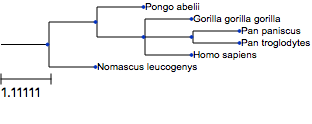

In [37]:
#ete_tree.render('%%inline')

---

## Example 4 - Visualising the Distribution of PAM Distances in the Taxonomic Space

In this example, we compare the distribution of the evolutionary distance (in PAM units) between the 1:1 pairwise orthologues between Human and _Mus musculus_ (Mouse) as well as Human and _Canis lupus familiaris_ (Dog).

We start by loading the pairwise data for 1:1 orthologues.

In [38]:
human_mouse_iter = c.pairwise(genome_id1='HUMAN',
                              genome_id2='MOUSE',
                              rel_type='1:1',
                              progress=True)

In [39]:
human_mouse_iter

We have recieved a "PagedResponse". As there are a lot of pairwise entries between then two genomes, the response size is limited. The object returned here is a generator which will lazily load the following page of results each time we get to the end.

We can either use a for loop over this, or capture the entire response in one go. Here, we only want to extract the distance and don't care about any entry information.

In [40]:
import numpy as np

human_mouse = np.array([x.distance for x in human_mouse_iter])

human_dog = np.array([x.distance for x in c.pairwise(genome_id1='HUMAN',
                                                     genome_id2='CANLF',
                                                     rel_type='1:1',
                                                     progress=True)])

Loading pairs:  84%|████████▍ | 15349/18254 [00:08<00:01, 1762.42 entries/s]


In [41]:
%matplotlib inline
import seaborn as sns
sns.set()

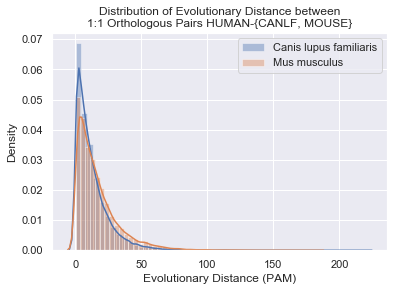

In [42]:
ax = sns.distplot(human_dog, label='Canis lupus familiaris')
ax = sns.distplot(human_mouse, label='Mus musculus', ax=ax)

ax.set_title('Distribution of Evolutionary Distance between\n1:1 Orthologous Pairs HUMAN-{CANLF, MOUSE}')
ax.set_xlabel('Evolutionary Distance (PAM)')
ax.set_ylabel('Density')
ax.legend()

In [43]:
from scipy import stats

We can use the two sample Kolmogorov-Smirnov test, available in scipy, in order to test whether the two samples are drawn from the same distribution.

In [44]:
z = stats.ks_2samp(human_mouse, human_dog)

In [45]:
z.pvalue

5.16481402754209e-90

This indicates that they are not drawn from the same distribution.

We can also look at the median / mean distance.

In [46]:
print('Median:',
      '\nHUMAN-MOUSE', np.median(human_mouse),
      '\nHUMAN-CANLF', np.median(human_dog))

print('Mean:'
      '\nHUMAN-MOUSE', np.mean(human_mouse),
      '\nHUMAN-CANLF', np.mean(human_dog))

Median: 
HUMAN-MOUSE 11.774700164794922 
HUMAN-CANLF 8.655900001525879
Mean:
HUMAN-MOUSE 16.42020220052249 
HUMAN-CANLF 12.539905405603653


The mean distance between HUMAN and CANLF is less than that of HUMAN and MOUSE. This is consistent with previous observations that the rodent has a longer branch than humans and carnivores.

---

## Example 5 - annotating protein sequences not present in OMA

Although the OMA database currently analyses over 2,100 genomes, many more have been sequenced, and the gap keeps on widening. It is nevertheless possible to use OMA to infer the function of custom protein sequences through a fast approximate search against all sequences in OMA.

Here, we show this fast mapping, with a mystery gene (the cystic fibrosis transmembrane conductance regulator in the Emperor penguin -- `A0A087RGQ1_APTFO`).

In [47]:
mystery_seq = 'FFFLLRWTKPILRKGYRRRLELSDIYQIPSADSADNLSEKLEREWDRELATSKKKPKLINALRRCFFWKFMFYGIILYLGEVTKSVQPLLLGRIIASYDPDNSDERSIAYYLAIGLCLLFLVRTLLIHPAIFGLHHIGMQMRIAMFSLIYKKILKLSSRVLDKISTGQLVSLLSNNLNKFDEGLALAHFVWIAPLQVALLMGLLWDMLEASAFSGLAFLIVLAFFQAWLGQRMMKYRNKRAGKINERLVITSEIIENIQSVKAYCWEDAMEKMIESIRETELKLTRKAAYVRYFNSSAFFFSGFFVVFLAVLPYAVIKGIILRKIFTTISFCIVLRMTVTRQFPGSVQTWYDSIGAINKIQDFLLKKEYKSLEYNLTTTGVELDKVTAFWDEGIGELFVKANQENNNSKAPSTDNNLFFSNFPLHASPVLQDINFKIEKGQLLAVSGSTGAGKTSLLMLIMGELEPSQGRLKHSGRISFSPQVSWIMPGTIKENIIFGVSYDEYRYKSVIKACQLEEDISKFPDKDYTVLGDGGIILSGGQRARISLARAVYKDADLYLLDSPFGHLDIFTEKEIFESCVCKLMANKTRILVTSKLEHLKIADKILILHEGSCYFYGTFSELQGQRPDFSSELMGFDSFDQFSAERRNSILTETLRRFSIEGEGTGSRNEIKKQSFKQTSDFNDKRKNSIIINPLNASRKFSVVQRNGMQVNGIEDGHNDPPERRFSLVPDLEQGDVGLLRSSMLNTDHILQGRRRQSVLNLMTGTSVNYGPNFSKKGSTTFRKMSMVPQTNLSSEIDIYTRRLSRDSVLDITDEINEEDLKECFTDDAESMGTVTTWNTYFRYVTIHKNLIFVLILCVTVFLVEVAASLAGLWFLKQTALKANTTQSENSTSDKPPVIVTVTSSYYIIYIYVGVADTLLAMGIFRGLPLVHTLITVSKTLHQKMVHAVLHAPMSTFNSWKAGGMLNRFSKDTAVLDDLLPLTVFDFIQLILIVIGAITVVSILQPYIFLASVPVIAAFILLRAYFLHTSQQLKQLESEARSPIFTHLVTSLKGLWTLRAFGRQPYFETLFHKALNLHTANWFLYLSTLRWFQMRIEMIFVVFFVAVAFISIVTTGDGSGKVGIILTLAMNIMGTLQWAVNSSIDVDSLMRSVGRIFKFIDMPTEEMKNIKPHKNNQFSDALVIENRHAKEEKNWPSGGQMTVKDLTAKYSEGGAAVLENISFSISSGQRVGLLGRTGSGKSTLLFAFLRLLNTEGDIQIDGVSWSTVSVQQWRKAFGVIPQKVFIFSGTFRMNLDPYGQWNDEEIWKVAEEVGLKSVIEQFPGQLDFVLVDGGCVLSHGHKQLMCLARSVLSKAKILLLDEPSAHLDPVTSQVIRKTLKHAFANCTVILSEHRLEAMLECQRFLVIEDNKLRQYESIQKLLNEKSSFRQAISHADRLKLLPVHHRNSSKRKPRPKITALQEETEEEVQETRL'

In [48]:
res = c.function(mystery_seq)

This returns a list of results. The first is of the form

In [49]:
res[0]

{'Aspect': 'F',
 'Assigned_By': 'OMA_FastMap',
 'DB': 'OMA_FastMap',
 'DB:Reference': 'OMA_Fun:002',
 'DB_Object_Name': '',
 'DB_Object_Type': 'protein',
 'Date': '20180807',
 'Evidence': 'IEA',
 'GO_ID': 'GO:0000166',
 'GO_name': 'nucleotide binding',
 'Qualifier': '',
 'Synonym': '',
 'With': 'Approx:TAEGU04269:11919.380438514474'}

All list-typed returns are possible to load as a pandas data frame (`pd.DataFrame`), instead. To do this, the following call can be made.

In [50]:
df = c.function(mystery_seq, as_dataframe=True)

In [51]:
df

,Aspect,Assigned_By,DB,DB:Reference,DB_Object_Name,DB_Object_Type,Date,Evidence,GO_ID,GO_name,Qualifier,Synonym,With
0,F,OMA_FastMap,OMA_FastMap,OMA_Fun:002,,protein,20180807,IEA,GO:0000166,nucleotide binding,,,Approx:TAEGU04269:11919.380438514474
1,F,OMA_FastMap,OMA_FastMap,OMA_Fun:002,,protein,20180807,IEA,GO:0005254,chloride channel activity,,,Approx:TAEGU04269:11919.380438514474
2,F,OMA_FastMap,OMA_FastMap,OMA_Fun:002,,protein,20180807,IEA,GO:0005260,intracellularly ATP-gated chloride channel act...,,,Approx:TAEGU04269:11919.380438514474
3,F,OMA_FastMap,OMA_FastMap,OMA_Fun:002,,protein,20180807,IEA,GO:0005524,ATP binding,,,Approx:TAEGU04269:11919.380438514474
4,C,OMA_FastMap,OMA_FastMap,OMA_Fun:002,,protein,20180807,IEA,GO:0005737,cytoplasm,,,Approx:TAEGU04269:11919.380438514474
5,C,OMA_FastMap,OMA_FastMap,OMA_Fun:002,,protein,20180807,IEA,GO:0005769,early endosome,,,Approx:TAEGU04269:11919.380438514474
6,C,OMA_FastMap,OMA_FastMap,OMA_Fun:002,,protein,20180807,IEA,GO:0005789,endoplasmic reticulum membrane,,,Approx:TAEGU04269:11919.380438514474
7,C,OMA_FastMap,OMA_FastMap,OMA_Fun:002,,protein,20180807,IEA,GO:0005829,cytosol,,,Approx:TAEGU04269:11919.380438514474
8,C,OMA_FastMap,OMA_FastMap,OMA_Fun:002,,protein,20180807,IEA,GO:0005886,plasma membrane,,,Approx:TAEGU04269:11919.380438514474
9,C,OMA_FastMap,OMA_FastMap,OMA_Fun:002,,protein,20180807,IEA,GO:0005887,integral component of plasma membrane,,,Approx:TAEGU04269:11919.380438514474


This results in 54 GO annotations. By comparison, this sequence has merely 15 GO annotations in UniProt-GOA — all of which are also predicted by this method in OMA.